<a href="https://colab.research.google.com/github/elaine-chenma/AutoML/blob/master/Flower_picture_classfication_with_AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective

In this notebook, I aim to use Google AutoML Vision to train classification model for picture labeling. I firstly trained the model with 3667 labeled pictures. The evaluation has a precision rate of 95.687%. Further, I tested the model with three pictures randomly found on the Internet, and AutoML got all of them!

# GCP AutoML






![GCP AutoML](https://user-images.githubusercontent.com/58792/45260264-134c4800-b397-11e8-9832-fd56a8eeaa3c.png)


**[GCP AutoML Products](https://cloud.google.com/automl/)**

*  [AutoML Vision](https://cloud.google.com/vision/automl/docs/)
*  [AutoML Natural Language](https://cloud.google.com/natural-language/automl/docs/)
*  [AutoML Translation](https://cloud.google.com/translate/automl/docs/)


### GCP AutoML Demo


Training to recognize flowers

![upload_data](https://user-images.githubusercontent.com/58792/45438280-94dbf880-b66b-11e8-850d-e7d2a32c45c8.png)

![train](https://user-images.githubusercontent.com/58792/45438281-94dbf880-b66b-11e8-9951-80202c581b0c.png)

![predict](https://user-images.githubusercontent.com/58792/45439236-1fbdf280-b66e-11e8-9f51-d92d26a63c64.png)

## GCP Vision API

https://cloud.google.com/vision/

![Vision API](https://cloud.google.com/images/products/vision/image-search.svg)

* [Step 1:  Enable API](https://cloud.google.com/vision/docs/before-you-begin)

### Load Google Credentials with GDrive


In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
import os;os.listdir("/content/gdrive/My Drive/awsml")

['credentials', 'GCP_AUTOML.json']

In [0]:
!ls -la /content/gdrive/My\ Drive/awsml

total 3
-rw------- 1 root root  116 Mar  4 07:11 credentials
-rw------- 1 root root 2341 Mar  4 07:51 GCP_AUTOML.json


Install cloud vision Api

In [0]:
!export GOOGLE_APPLICATION_CREDENTIALS="/content/gdrive/My\ Drive/awsml/GCP_AUTOML.json"
!gcloud auth activate-service-account --key-file /content/gdrive/My\ Drive/awsml/GCP_AUTOML.json
!pip install --upgrade -q google-cloud-vision

Activated service account credentials for: [nlp-machen@mercurial-bruin-232617.iam.gserviceaccount.com]


## Test with new pictures

In [0]:
import os;os.listdir("/content/gdrive/My Drive/452_HW")

['daisy.jpg', 'dandelion.jpg', 'ROSE.jpeg', 'automl vision.png']

#### Test with Vision ImageAnnotator API

This API does not require model training

In [0]:
import io
import os

os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/gdrive/My Drive/awsml/GCP_AUTOML.json"

# Imports the Google Cloud client library
from google.cloud import vision
from google.cloud.vision import types

# Instantiates a client
client = vision.ImageAnnotatorClient()

# The name of the image file to annotate
path = '/content/gdrive/My Drive/452_HW/'
file_name = 'daisy.jpg'

# Loads the image into memory
with io.open(path+file_name, 'rb') as image_file:
    content = image_file.read()

image = types.Image(content=content)

# Performs label detection on the image file
response = client.label_detection(image=image)
labels = response.label_annotations

print('Labels:')
for label in labels:
    print(label.description)

Labels:
Flower
Flowering plant
Oxeye daisy
Daisy
White
Petal
chamomile
mayweed
Plant
barberton daisy


#### Test with AutoML trained model

Below screenshot is the picture classification model I trained with AutoML.

![alt text](https://github.com/melodydadada/AutoML/blob/master/automl%20vision.png?raw=true)

In [0]:
!pip install google-cloud-automl

    100% |████████████████████████████████| 71kB 2.9MB/s 


In [0]:
import sys

from google.cloud import automl_v1beta1
from google.cloud.automl_v1beta1.proto import service_pb2


def get_prediction(file_name, project_id, model_id):
  prediction_client = automl_v1beta1.PredictionServiceClient()
  
  # The name of the image file to annotate
  path = '/content/gdrive/My Drive/452_HW/'
  
  # Loads the image into memory
  with io.open(path+file_name, 'rb') as image_file:
    content = image_file.read()

  name = 'projects/{}/locations/us-central1/models/{}'.format(project_id, model_id)
  payload = {'image': {'image_bytes': content }}
  params = {}
  request = prediction_client.predict(name, payload, params)
  return request  # waits till request is returned



In [0]:
# test with daisy picture
file_name_input = 'daisy.jpg'
project_id_input = 'mercurial-bruin-232617'
model_id_input = 'ICN4229014095770090137'

print(get_prediction(file_name=file_name_input, project_id=project_id_input,  model_id=model_id_input))

payload {
  classification {
    score: 1.0
  }
  display_name: "daisy"
}



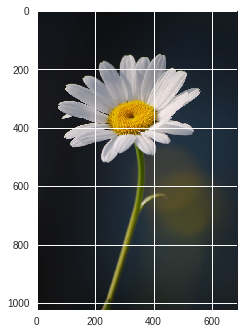

In [0]:
import matplotlib.pyplot as plt
import cv2
path = '/content/gdrive/My Drive/452_HW/'
image = cv2.imread(path+'daisy.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [0]:
# test with dandelion picture
file_name_input = 'dandelion.jpg'

print(get_prediction(file_name=file_name_input, project_id=project_id_input,  model_id=model_id_input))

payload {
  classification {
    score: 0.9999998807907104
  }
  display_name: "dandelion"
}



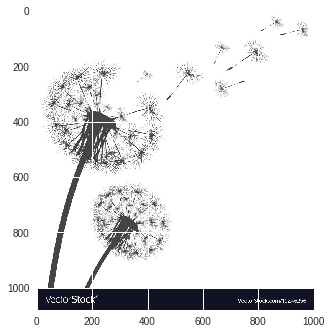

In [0]:
import matplotlib.pyplot as plt
import cv2
path = '/content/gdrive/My Drive/452_HW/'
image = cv2.imread(path+'dandelion.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [0]:
# test with rose picture
file_name_input = 'ROSE.jpeg'

print(get_prediction(file_name=file_name_input, project_id=project_id_input,  model_id=model_id_input))

payload {
  classification {
    score: 0.9999990463256836
  }
  display_name: "roses"
}



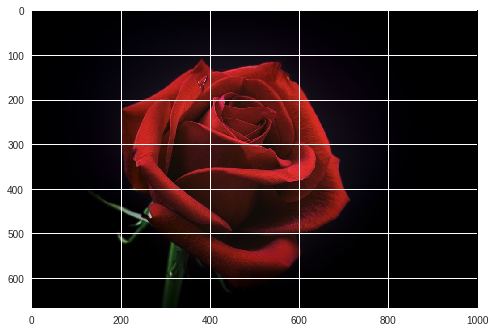

In [0]:
import matplotlib.pyplot as plt
import cv2
path = '/content/gdrive/My Drive/452_HW/'
image = cv2.imread(path+'ROSE.jpeg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

# Conclusion

If we have a bunch of unlabelled pictures and want to have them labelled and have a general understanding of what’s in the pictures, Vision ImageAnnotator is a plug-in tool.

If we have labelled training data and want to perform a classification task based on existing knowledge, AutoML Vision allow users to build their own model and predict new items.